# Lending Club Loan Data Analysis.

## DESCRIPTION
### Create a model that predicts whether or not a loan will be default using the historical data.

## Problem Statement Scenario:
#### For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

## Domain: Finance

### Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 


#### Content: 
#### Dataset columns and definition:
##### credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
##### purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
##### int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
##### installment: The monthly installments owed by the borrower if the loan is funded.
##### log.annual.inc: The natural log of the self-reported annual income of the borrower.
##### dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
##### fico: The FICO credit score of the borrower.
##### days.with.cr.line: The number of days the borrower has had a credit line.
##### revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
##### revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
##### inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
##### delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
##### pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Steps to perform:

#### Perform exploratory data analysis and feature engineering and then apply feature engineering. 
#### Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

## Tasks:

##### 1.     Feature Transformation
        Transform categorical values into numerical values (discrete)

##### 2.     Exploratory data analysis of different factors of the dataset.

##### 3.     Additional Feature Engineering
    You will check the correlation between features and will drop those features which have a strong correlation
    This will help reduce the number of features and will leave you with the most relevant features

##### 4.     Modeling
    After applying EDA and feature engineering, you are now ready to build the predictive models
    In this part, you will create a deep learning model using Keras with Tensorflow backend

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Import necessary modules</h2></center>

In [170]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 999

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Load Data</h2></center>

In [171]:
import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\loan_data.csv


In [172]:
file=r'.\input\loan_data.csv'

In [173]:
df=pd.read_csv(file)
print("Input Data has ", df.shape[0],"Rows and ",df.shape[1], "Columns", )

Input Data has  9578 Rows and  14 Columns


In [174]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
4451,1,credit_card,0.1183,106.03,10.910186,20.96,702,3630.000000,16948,83.5,0,0,0,0
7315,1,debt_consolidation,0.1136,789.87,11.502875,19.79,732,4650.041667,21459,52.0,0,0,0,0
3419,1,all_other,0.1284,84.05,10.275051,17.17,692,2940.000000,1687,39.2,0,0,1,1
4048,1,all_other,0.1284,268.95,10.308953,4.28,687,4949.958333,1602,76.3,0,0,0,0
2921,1,debt_consolidation,0.1474,345.37,11.736101,9.34,677,5762.000000,12403,39.8,2,1,0,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [176]:
df.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [177]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Check for missing values or null values</h5></left>

In [178]:
df.isnull().sum().sum()

0

In [179]:
NAs= pd.concat([df.isnull().sum()],axis=1,keys=['Count of NANs'])
NAs.sample(14)

,Count of NANs
revol.util,0
fico,0
installment,0
delinq.2yrs,0
not.fully.paid,0
pub.rec,0
inq.last.6mths,0
days.with.cr.line,0
log.annual.inc,0
revol.bal,0


In [180]:
NAs[NAs.sum(axis=1)>0]

,Count of NANs


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">It is good that there is no missing values or no null values</h5></left>

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Now let us have a look at the data type of all the variables present in the input dataset</h5></left>

In [181]:
# Now let us have a look at the data type of all the variables present in the training dataset
dtype_data=df.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,7
1,float64,6
2,object,1


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">So 7 columns are integers with 1 object columns and 6 float column <BR/><BR/> Analyze the column types of input data</h5></left>


In [182]:

# posible data types in pandas
numerics=['int16','int32','int64','float16','float32','float64']  # numeric
objects = ['O']

df_num = df.select_dtypes(include=numerics)
df_cat = df.select_dtypes(include=objects)

print(df_cat.columns)
print(df_num.columns)

Index(['purpose'], dtype='object')
Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


### Check the label “no.fully.paid” distribution in the dataset.

In [183]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

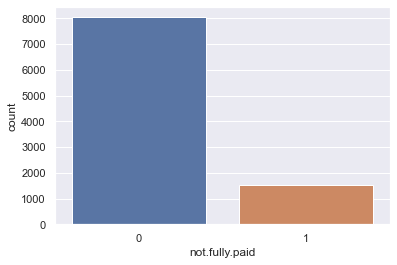

In [184]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

##### The above shows, This dataset is highly imbalanced and includes features that make this problem more challenging. If we do model training with this data, the prediction will be biased since the “not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”

#### To handle the imbalance of target variable "not.fully.paid" <B>Oversampling</B> is used when the quantity of data is insufficient.It tries to balance the dataset by increasing the size of rare samples.
Over-sample the minority class with or w/o replacement by making the number of positive and negative examples equal. We’ll add around 6500 samples from the training data set with this strategy. It’s a lot more computationally expensive than under-sampling. Also, it’s more prune to overfitting due to repeated examples.

Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

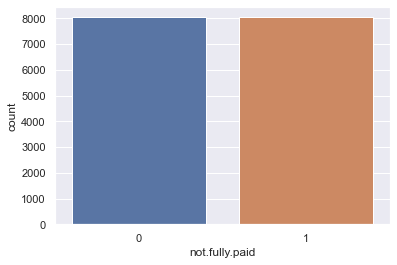

In [185]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_0, df_1_over], axis=0)

print('Random over-sampling:')
print(df_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_over)

In [186]:
df_over = df_over.reset_index()
df_over[df_over.index.duplicated()]

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


<center><h1 style="font-size:160%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">Categorical Variables:
</h1></center>

In [187]:
dtype_data.loc[1:1,:]

,Count,Column Type
1,purpose,object


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">So purpose is the only object column</h5></left>

In [188]:
df_over[['purpose']].sample(10)

,purpose
6533,all_other
6275,credit_card
12066,all_other
6034,debt_consolidation
10562,major_purchase
1563,small_business
281,credit_card
13139,all_other
8030,debt_consolidation
2897,all_other


<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">The column purpose is categorical<BR/><BR/> Looking into categorical feature</h5></left>

In [189]:
# display distinct value for each categorical feature
df_cat = df_over.select_dtypes(include=objects)
for col_name in df_cat.columns:
    print('The unique values in ' +col_name+ ' are: ', df_cat[col_name].nunique())
    print(df_cat[col_name].unique())

The unique values in purpose are:  7
['debt_consolidation' 'credit_card' 'home_improvement' 'small_business'
 'major_purchase' 'all_other' 'educational']


In [190]:
df_over['purpose'].value_counts()

debt_consolidation    6460
all_other             4037
credit_card           1902
small_business        1352
home_improvement      1062
major_purchase         643
educational            634
Name: purpose, dtype: int64

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Analyze the not.fully.paid - for  cat column purpose<BR/> * To assess the usefulness of categorical feature we shall use boxplot</h5></left>

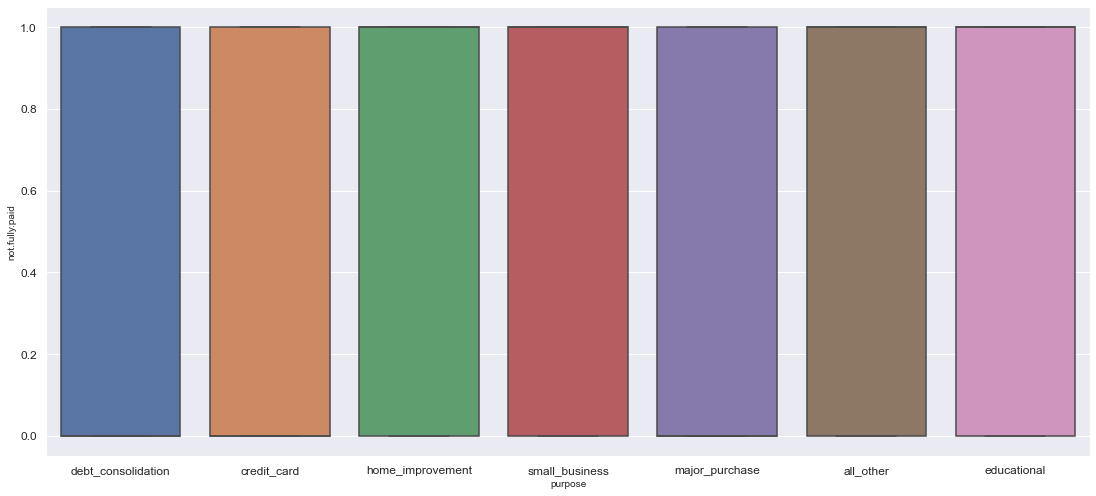

In [192]:
# value of credit.policy(target variable) change for categorical column purpose .....
cols=['purpose']

for col in cols:
    plt.figure(figsize=(18.7,8.27))
    sns.boxplot(x=col,y='not.fully.paid',data=df_over)
    plt.xlabel(col,fontsize=10)
    plt.ylabel('not.fully.paid',fontsize=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

##### Boxplot shows not.fully.paid data distribution is 1 or 0 and spread across all the categories of purpose.
Let us see the count of different purpose

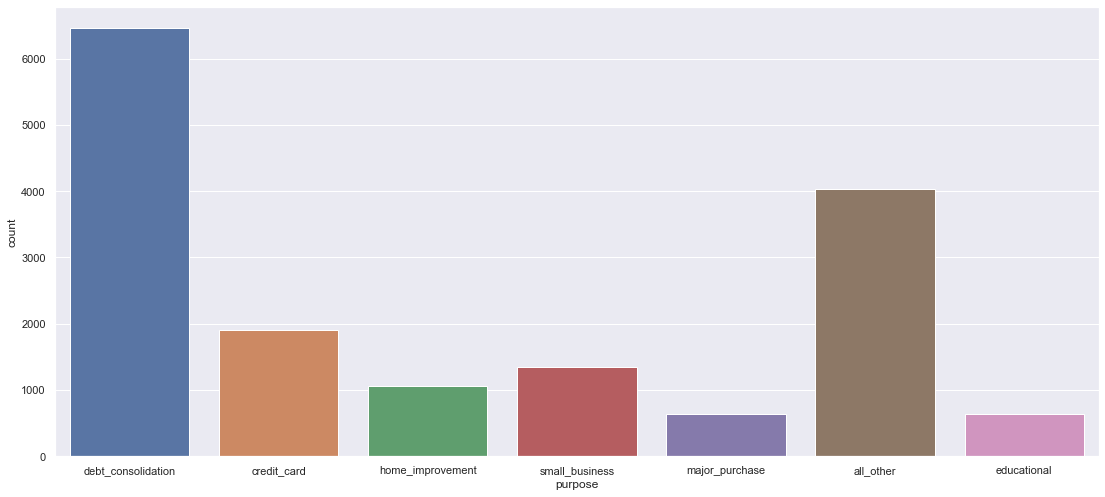

In [193]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18.7,8.27)})
ax = sns.countplot(x="purpose",  data=df_over)

##### Countplot showing debt_consolidation purpose have highest no. of purpose for not paid with lowest being education

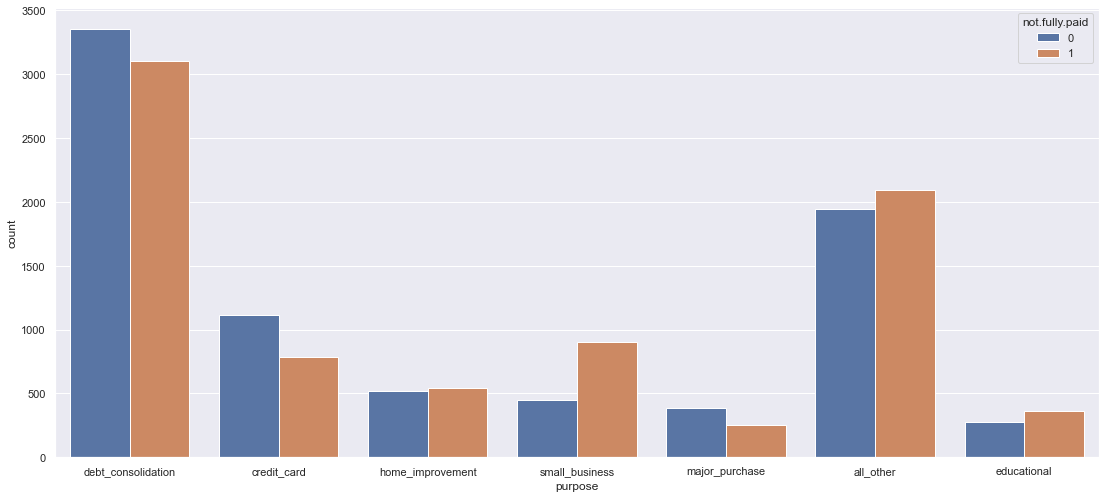

In [219]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(18.7,8.27)})
ax = sns.countplot(x="purpose",  hue="not.fully.paid", data=df_over)

##### debt_consolidation has highest 0 count for not paid, followed by all_other and credit_card purpose

<left><h5 style="font-size:130%; font-family:arial; background:lightgreen; color:black; border-radius:10px 10px; padding:10px;">Observation: <BR/> The categorical column Purpose is having random distribution for every category and would contribute to the final credit policy target <BR/><BR/> </h5></left>


### Feature Transformation

### Transform categorical values into numerical values (discrete)

In [203]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_over,columns=col_fea,drop_first=True)
final_data = final_data.drop(["index"], axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         160

## Exploratory data analysis of different factors of the dataset.

##### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

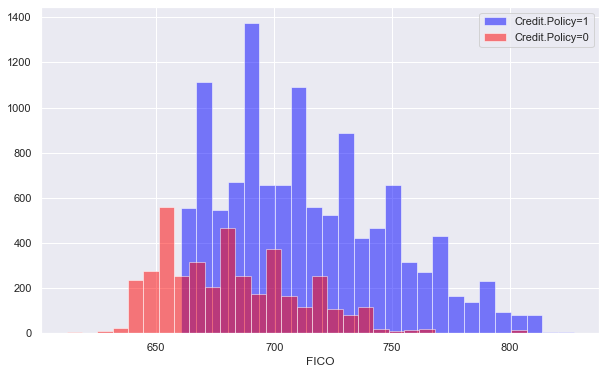

In [196]:
plt.figure(figsize=(10,6))
df_over[df_over['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df_over[df_over['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

##### Let's see a similar chart for “not.fully.paid” column.


Text(0.5, 0, 'FICO')

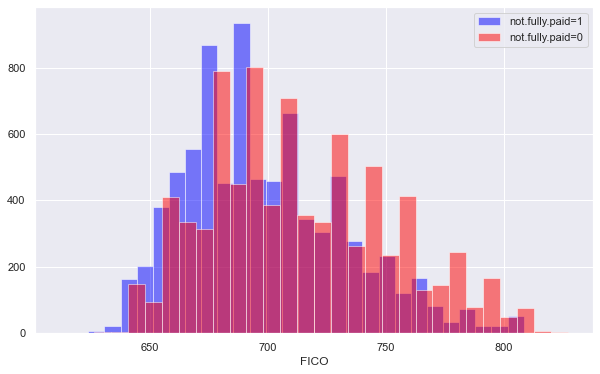

In [197]:
plt.figure(figsize=(10,6))
df_over[df_over['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df_over[df_over['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

##### Now, check the dataset group by loan purpose. Create a countplot with the color hue defined by not.fully.paid.

<AxesSubplot:xlabel='purpose', ylabel='count'>

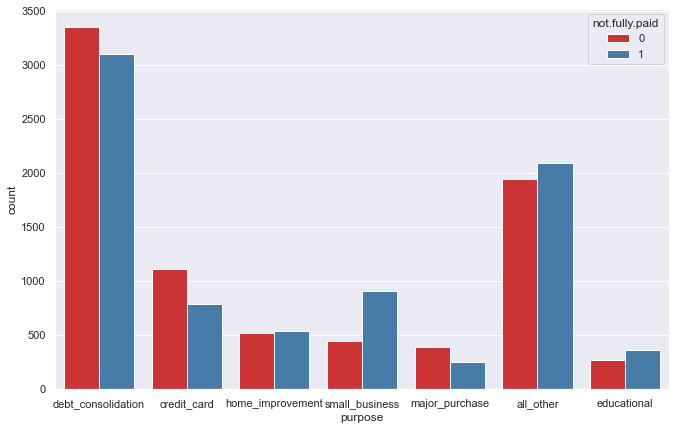

In [198]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df_over,palette='Set1')

##### The next visual we will pull part of EDA in this dataset is the trend between FICO score and interest rate.

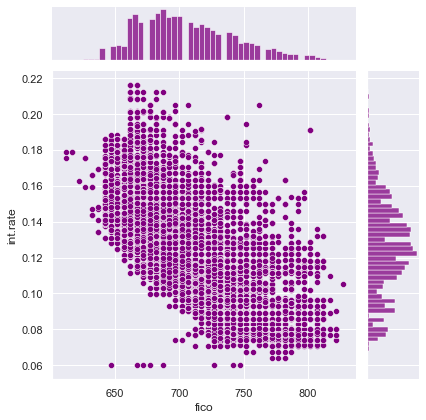

In [199]:
sns.jointplot(x='fico',y='int.rate',data=df_over,color='purple')

##### To compare the trend between not.fully.paid and credit.policy, create seaborn implot.

<Figure size 792x504 with 0 Axes>

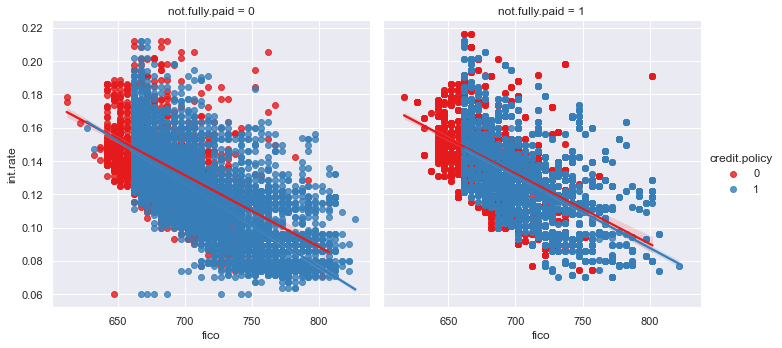

In [200]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df_over,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

###    Additional Feature Engineering
##### You will check the correlation between features and will drop those features which have a strong correlation
##### This will help reduce the number of features and will leave you with the most relevant features

<AxesSubplot:>

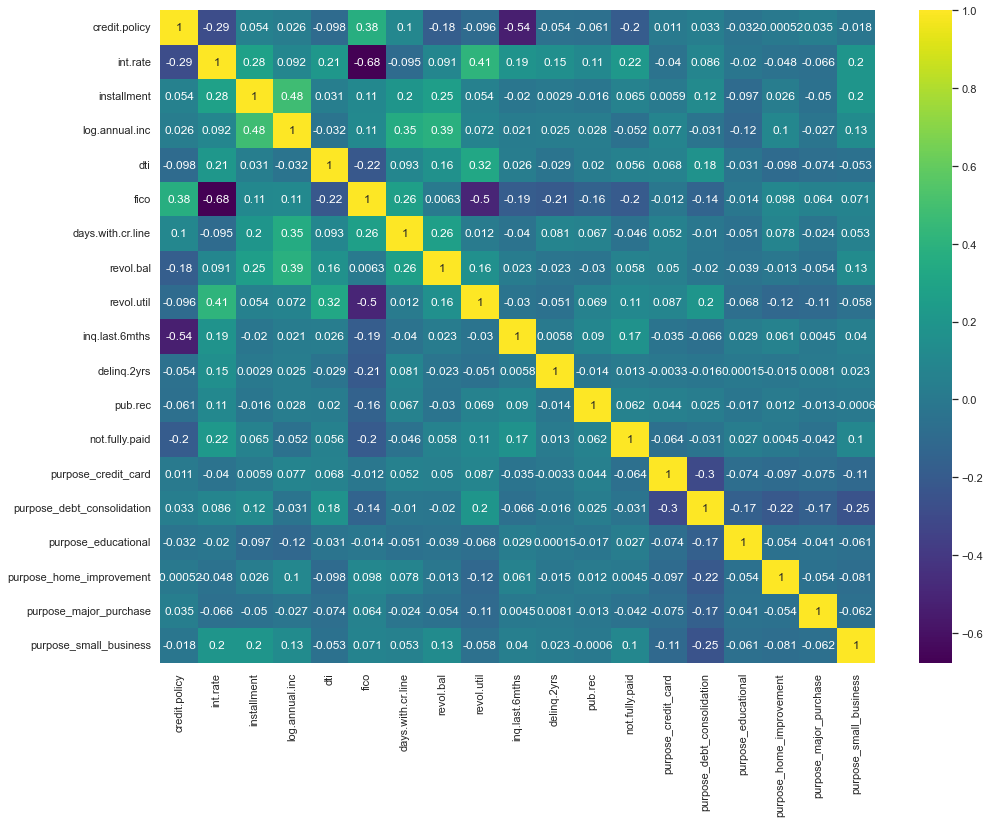

In [205]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=True, 
        fmt='.2g'
)

#####  Negative Correlation (Deep Purple):  <B>fico and int.rate</B>  
#####  Positive Correlation (Light Green):  <B>credit.policy and fico</B> <B>int.rate and revol.util</B> <B>installment and log.annual.inc</B> 
#####  <B> log.annual.inc and revol.bal,days.with.cr.line,installment </B>
##### After comparing the correlation and checking the feature description, <B >we can drop:'revol.bal', 'days.with.cr.line', 'installment', 'revol.util'.</B>
##### revol.bal, day.with.cr.line, installment can be represented by log.annual.inc. revol.util can represent by int.rate.

In [206]:
features_to_drop=['revol.bal', 'days.with.cr.line', 'installment','revol.util']
final_data_fe=final_data.drop(features_to_drop,axis=1)
final_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   log.annual.inc              16090 non-null  float64
 3   dti                         16090 non-null  float64
 4   fico                        16090 non-null  int64  
 5   inq.last.6mths              16090 non-null  int64  
 6   delinq.2yrs                 16090 non-null  int64  
 7   pub.rec                     16090 non-null  int64  
 8   not.fully.paid              16090 non-null  int64  
 9   purpose_credit_card         16090 non-null  uint8  
 10  purpose_debt_consolidation  16090 non-null  uint8  
 11  purpose_educational         16090 non-null  uint8  
 12  purpose_home_improvement    16090 non-null  uint8  
 13  purpose_major_purchase      160

<center><h1 style="font-size:170%; font-family:arial; background:yellow; color:black; border-radius:10px 10px; padding:10px;">    
Important Variables:

</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">    
Now let us run and xgboost model to get the important variables.

</h1></center>

[20:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




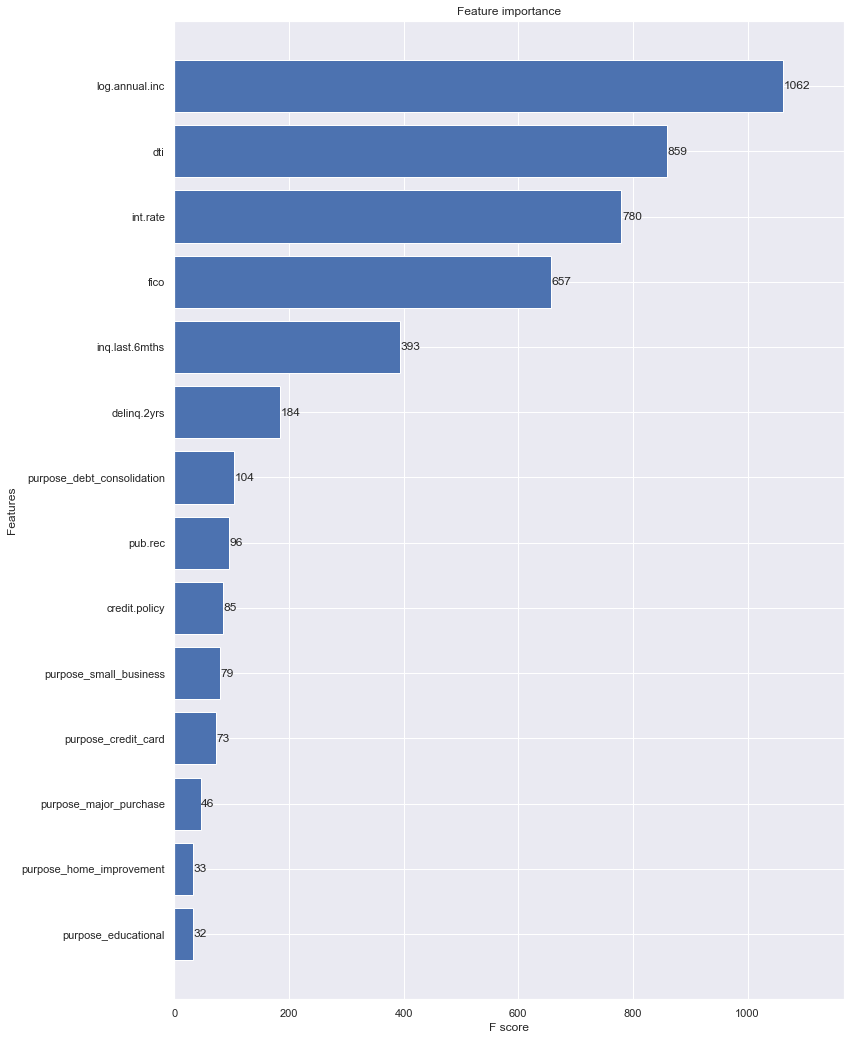

In [208]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

y = final_data_fe['not.fully.paid'].values
X =final_data_fe.drop(["not.fully.paid"], axis=1)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

</h1></center>
<center><h1 style="font-size:140%; font-family:arial; background:skyblue; color:black; border-radius:10px 10px; padding:10px;">    
Let us also build a Random Forest model and check the important variables.

</h1></center>

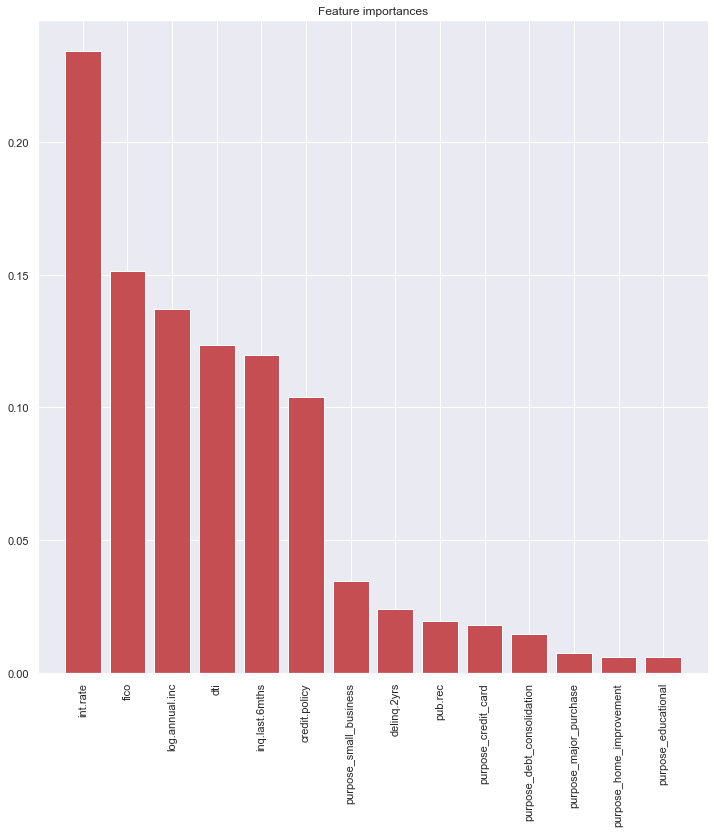

In [209]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(X, y)
feat_names = X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

<center><h1 style="font-size:170%; font-family:arial; background:Red; color:white; border-radius:10px 10px; padding:10px;"> Deep Learning Model Implementation</h1></center>

##### Do the train test split and fit the model with the data shape we created above. since there are now 14 features, the first layer of the neural network is created with 14 nodes.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report


In [210]:
to_train = final_data_fe[final_data_fe['not.fully.paid'].isin([0,1])]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(14, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 9ms/step - loss: 0.6902 - accuracy: 0.5420 - val_loss: 0.6857 - val_accuracy: 0.5823
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5987 - val_loss: 0.6747 - val_accuracy: 0.6004
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6065 - val_loss: 0.6651 - val_accuracy: 0.6012
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.6109 - val_loss: 0.6591 - val_accuracy: 0.6035
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6150 - val_loss: 0.6565 - val_accuracy: 0.6058
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6181 - val_loss: 0.6555 - val_accuracy: 0.6111
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6202 - val_loss: 0.6549 - val_accuracy: 0.6099
Epoch 8/200
4

##### Model Evaluation and Validation

<AxesSubplot:>

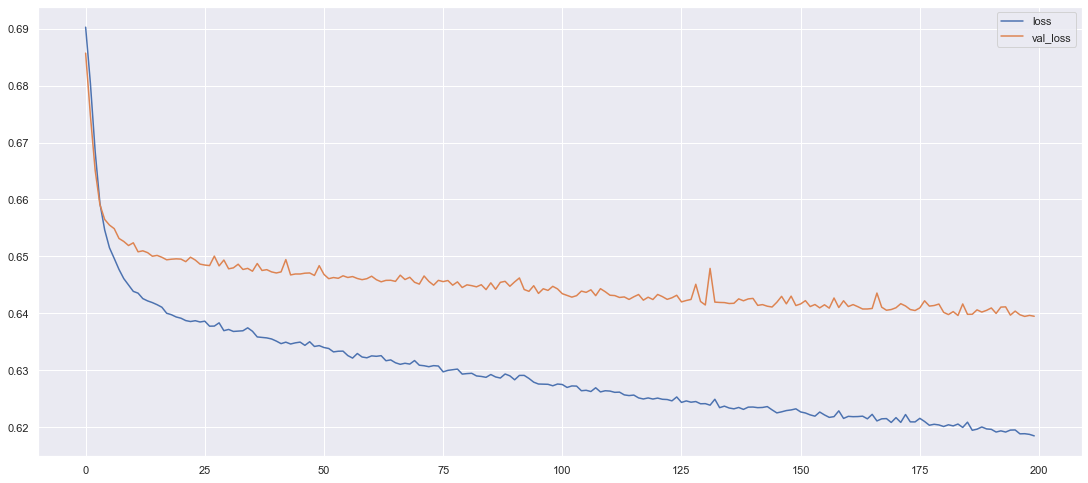

In [211]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

##### This validation result, the Loss plot, shows us the model is overfitted.

In [212]:
y_pred = model.predict(X_test)
threshold=0.5
y_pred=np.where(y_pred > threshold, 1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [213]:
print(
        confusion_matrix(y_test,y_pred), 
        '\n', 
        classification_report(y_test,y_pred)
)

[[1591  846]
 [ 951 1439]] 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      2437
           1       0.63      0.60      0.62      2390

    accuracy                           0.63      4827
   macro avg       0.63      0.63      0.63      4827
weighted avg       0.63      0.63      0.63      4827



#### The model’s overall f1-score for accuracy is 0.63. Still, there are type 2 errors (951) in the prediction.

### Model Refinement

##### Two ways of refining the model we will try here. 
Add Dropout layers to bring down the overfitting OR 
Lower the cut-off line in binary prediction to reduce the Type 2 error, at the cost of increasing Type 1 error. 
In the LendingClub case, Type 2 error is the more serious problem because it devastates its balance sheet, while Type 1 error is not a very big deal.

In [215]:
model_new = Sequential()

model_new.add(
        Dense(14, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 9ms/step - loss: 0.6930 - binary_accuracy: 0.5075 - val_loss: 0.6909 - val_binary_accuracy: 0.5797
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6904 - binary_accuracy: 0.5340 - val_loss: 0.6867 - val_binary_accuracy: 0.6029
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6846 - binary_accuracy: 0.5577 - val_loss: 0.6782 - val_binary_accuracy: 0.5993
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6803 - binary_accuracy: 0.5605 - val_loss: 0.6714 - val_binary_accuracy: 0.6024
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6749 - binary_accuracy: 0.5760 - val_loss: 0.6668 - val_binary_accuracy: 0.6068
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6724 - binary_accuracy: 0.5792 - val_loss: 0.6642 - val_binary_accuracy: 0.6031
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

<AxesSubplot:>

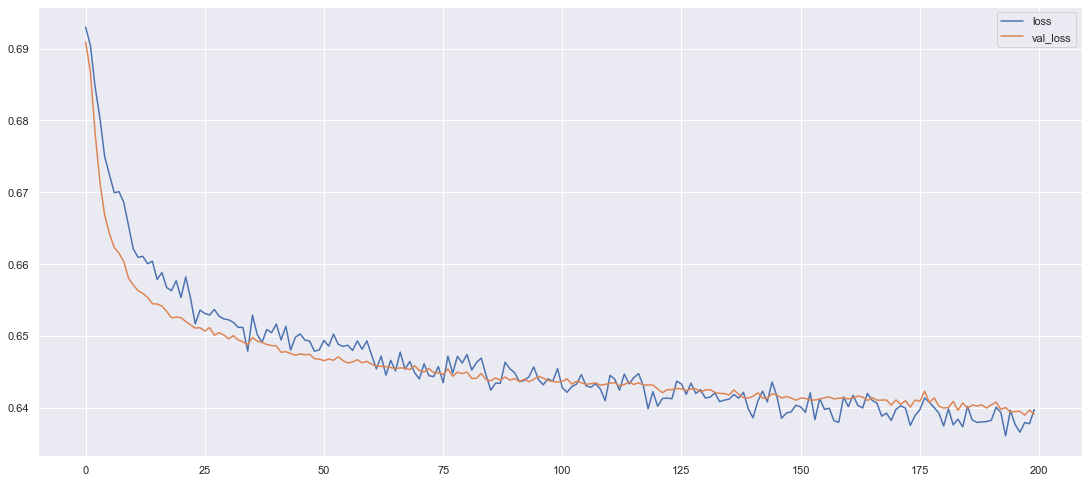

In [216]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

##### The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model.

In [217]:
y_pred_new = model.predict(X_test)
threshold=0.2
y_pred_new=np.where(y_pred > threshold, 1,0)
y_pred_new

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [109]:
print(
        confusion_matrix(y_test,y_pred_new), 
        '\n', 
        classification_report(y_test,y_pred_new)
)

[[ 460   91]
 [  88 2235]] 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       551
           1       0.96      0.96      0.96      2323

    accuracy                           0.94      2874
   macro avg       0.90      0.90      0.90      2874
weighted avg       0.94      0.94      0.94      2874



##### By changing the cut-off line to 0.2 (default is 0.5), we have dramatically brought down the Type 2 error.

#### Conclusion
##### When building the Neural Network, the most difficult part is the Sequential Model because there are many different options available in building the layers. The way how to come up with the optimized number of layers and nodes are remaining challenging.